In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# Load the data from CSV files
player_info = pd.read_csv('player_info.csv')
team_info = pd.read_csv('nhladb_team_info.csv')
skater_stats = pd.read_csv('nhladb_game_skater_stats.csv')
goalie_stats = pd.read_csv('nhladb_game_goalie_stats.csv')

## player_info

In [4]:
# Load the player_info DataFrame
player_info = pd.read_csv('player_info.csv')

# Display the updated DataFrame
print(player_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           3925 non-null   int64  
 1   firstName           3925 non-null   object 
 2   lastName            3925 non-null   object 
 3   nationality         3917 non-null   object 
 4   birthCity           3920 non-null   object 
 5   primaryPosition     3925 non-null   object 
 6   birthDate           3925 non-null   object 
 7   birthStateProvince  2802 non-null   object 
 8   height              3922 non-null   object 
 9   height_cm           3922 non-null   float64
 10  weight              3922 non-null   float64
 11  shootsCatches       3908 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 368.1+ KB
None


In [5]:
# Drop specified columns
columns_to_drop = ['nationality', 'birthCity', 'birthStateProvince', 'height', 'shootsCatches']
player_info.drop(columns=columns_to_drop, inplace=True)

# Fill nulls in 'height_cm' and 'weight' with 0.0 without using inplace
player_info['height_cm'] = player_info['height_cm'].fillna(0.0)
player_info['weight'] = player_info['weight'].fillna(0.0)

# Convert weight to kg, round to 2 decimal places, and add a new column
player_info['weight_kg'] = (player_info['weight'] * 0.453592).round(2)

player_info.columns = player_info.columns.str.lower()

# Optionally, check the info to confirm changes
player_info.info()
player_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        3925 non-null   int64  
 1   firstname        3925 non-null   object 
 2   lastname         3925 non-null   object 
 3   primaryposition  3925 non-null   object 
 4   birthdate        3925 non-null   object 
 5   height_cm        3925 non-null   float64
 6   weight           3925 non-null   float64
 7   weight_kg        3925 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 245.4+ KB


,player_id,firstname,lastname,primaryposition,birthdate,height_cm,weight,weight_kg
0,8466148,Marian,Hossa,RW,1979-01-12 00:00:00,185.42,207.0,93.89
1,8465058,Michal,Rozsival,D,1978-09-03 01:00:00,185.42,210.0,95.25
2,8476906,Shayne,Gostisbehere,D,1993-04-20 01:00:00,180.34,180.0,81.65
3,8466285,Brian,Campbell,D,1979-05-23 01:00:00,177.80,192.0,87.09
4,8470607,Brent,Seabrook,D,1985-04-20 01:00:00,190.50,220.0,99.79


In [6]:
# Check unique values in the 'primaryPosition' column
unique_positions = player_info['primaryposition'].unique()
print("Unique primary positions:", unique_positions)

Unique primary positions: ['RW' 'D' 'C' 'G' 'LW']


## team_info

In [8]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team_id    33 non-null     int64 
 1   shortname  33 non-null     object
 2   teamname   33 non-null     object
dtypes: int64(1), object(2)
memory usage: 924.0+ bytes


## skater_stats

In [10]:
skater_stats.info()
skater_stats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853314 entries, 0 to 853313
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   game_id    853314 non-null  int64
 1   player_id  853314 non-null  int64
 2   team_id    853314 non-null  int64
 3   timeonice  853314 non-null  int64
 4   assists    853314 non-null  int64
 5   goals      853314 non-null  int64
 6   shots      853314 non-null  int64
 7   takeaways  853314 non-null  int64
 8   blocked    853314 non-null  int64
dtypes: int64(9)
memory usage: 58.6 MB


,game_id,player_id,team_id,timeonice,assists,goals,shots,takeaways,blocked
0,2005020387,8467439,16,1439,1,0,0,0,0
1,2005020387,8468517,16,773,0,0,1,0,0
2,2005020387,8467557,14,432,0,0,1,0,0
3,2005020387,8459492,14,1047,0,0,1,0,0
4,2005020387,8464981,14,1216,0,0,1,0,0


## goalie_stats

In [12]:
goalie_stats.info()
goalie_stats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51143 entries, 0 to 51142
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   game_id    51143 non-null  int64
 1   player_id  51143 non-null  int64
 2   team_id    51143 non-null  int64
 3   timeonice  51143 non-null  int64
 4   saves      51143 non-null  int64
dtypes: int64(5)
memory usage: 2.0 MB


,game_id,player_id,team_id,timeonice,saves
0,2005020880,8467511,4,2121,16
1,2005020880,8465093,4,1479,4
2,2005020164,8469675,12,3585,25
3,2005020164,8467959,5,3556,28
4,2005020922,8460712,18,3585,30


## top 8 defense // 12 offense // 3 goalie

In [14]:
# Merge player_skater with player_info on 'player_id'
merged_data = pd.merge(skater_stats, player_info, on='player_id', how='left')

# Merge the resulting DataFrame with team_info on 'team_id'
merged_data = pd.merge(merged_data, team_info, on='team_id', how='left')

# Merge goalie_stats with player_info and team_info separately and then with merged_data
goalie_data = pd.merge(goalie_stats, player_info, on='player_id', how='left')
goalie_data = pd.merge(goalie_data, team_info, on='team_id', how='left')

# Concatenate the two DataFrames
merged_data = pd.concat([merged_data, goalie_data], ignore_index=True)

################################################################################ DUP CHECKS

# Check the column names
print("Merged DataFrame columns:", merged_data.columns)

# Check for duplicates
print(f"Total rows before dropping duplicates: {merged_data.shape[0]}")
print(f"Duplicate rows found: {merged_data.duplicated().sum()}")

# Drop duplicates while keeping only unique rows
merged_data.drop_duplicates(inplace=True)

################################################################################ AGE // WEIGHT

# Function to calculate age
def calculate_age(birth_date):
    if pd.isnull(birth_date):
        return None
    birth_date = datetime.strptime(birth_date.split()[0], "%Y-%m-%d")
    return (datetime(2021, 1, 1) - birth_date).days // 365

# Add age to the DataFrame
merged_data['Age'] = merged_data['birthdate'].apply(calculate_age)

# Filter players to keep only those under 26 years old
young_players = merged_data[merged_data['Age'] < 26].copy()

################################################################################ OFFENSE

# Filter for offensive players excluding those with primary positions 'D' or 'G'
forward_players = young_players[
    ~young_players['primaryposition'].str.contains('D|G', na=False)
].copy()

# Composite Score for Forwards with TOI normalization
forward_players.loc[:, 'ForwardCompositeScore'] = (
    (forward_players['goals'] * 3) +
    (forward_players['shots'] * 3) +
    (forward_players['assists'] * 1) +
    (forward_players['timeonice'] / 60 * 3) / 4
)

# Group by for forwards
forward_scores = forward_players.groupby(['player_id', 'firstname', 'lastname', 'birthdate', 
                                          'height_cm', 'weight_kg', 'shortname', 'teamname'], 
                                         as_index=False)['ForwardCompositeScore'].sum()

# Get the top 12 forward players by Composite Score
top_12_forward_players = forward_scores.nlargest(12, 'ForwardCompositeScore')

################################################################################ DEFENSE

# Calculate Composite Score for defense with TOI normalization
defensive_players = young_players[young_players['primaryposition'].str.contains('D', na=False)].copy()

# Composite Score for defensemen with TOI normalization
defensive_players.loc[:, 'DefensiveCompositeScore'] = (
    (defensive_players['takeaways'] * 3) +
    (defensive_players['blocked'] * 3) +
    (defensive_players['assists'] * 1) +
    (defensive_players['timeonice'] / 60 * 3) / 4
)

# Group by for defense
defensive_scores = defensive_players.groupby(['player_id', 'firstname', 'lastname', 'birthdate', 
                                              'height_cm', 'weight_kg', 'shortname', 'teamname'], 
                                             as_index=False)['DefensiveCompositeScore'].sum()

# Get the top 8 defensive players by Composite Score
top_8_defensive_players = defensive_scores.nlargest(8, 'DefensiveCompositeScore')

################################################################################ GOALIE

# Filter for goalie players
goalie_players = young_players[young_players['primaryposition'].str.contains('G', na=False)].copy()

# Composite Score for goalies with TOI normalization
goalie_players.loc[:, 'GoalieCompositeScore'] = (
    (goalie_players['saves'] * 7) +
    (goalie_players['timeonice'] / 60 * 3) / 2
)

# Group by for goalies
goalie_scores = goalie_players.groupby(['player_id', 'firstname', 'lastname', 'birthdate', 
                                        'height_cm', 'weight_kg', 'shortname', 'teamname'], 
                                       as_index=False)['GoalieCompositeScore'].sum()

# Get the top 3 goalies by Composite Score
top_3_goalies = goalie_scores.nlargest(3, 'GoalieCompositeScore')

################################################################################ RANKING

# Add ranking index
top_8_defensive_players['Rank'] = range(1, 9)
top_12_forward_players['Rank'] = range(1, 13)
top_3_goalies['Rank'] = range(1, 4)

# Display the results
print("\nTop 12 Forwards < 26:")
for index, row in top_12_forward_players.iterrows():
    age = young_players.loc[young_players['player_id'] == row['player_id'], 'Age'].values[0]
    print(f"Rank: {row['Rank']} - Forward Score: {row['ForwardCompositeScore']:.2f} - Player ID: {row['player_id']} - {row['firstname']} {row['lastname']} - Age: {age} - Height: {row['height_cm']:.2f} cm - Weight: {row['weight_kg']:.2f} kg - Team: {row['shortname']} ({row['teamname']})")

print("\nTop 8 Defensemen < 26:")
for index, row in top_8_defensive_players.iterrows():
    age = young_players.loc[young_players['player_id'] == row['player_id'], 'Age'].values[0]
    print(f"Rank: {row['Rank']} - Defensive Score: {row['DefensiveCompositeScore']:.2f} - Player ID: {row['player_id']} - {row['firstname']} {row['lastname']} - Age: {age} - Height: {row['height_cm']:.2f} cm - Weight: {row['weight_kg']:.2f} kg - Team: {row['shortname']} ({row['teamname']})")

print("\nTop 3 Goalies < 26:")
for index, row in top_3_goalies.iterrows():
    age = young_players.loc[young_players['player_id'] == row['player_id'], 'Age'].values[0]
    print(f"Rank: {row['Rank']} - Goalie Score: {row['GoalieCompositeScore']:.2f} - Player ID: {row['player_id']} - {row['firstname']} {row['lastname']} - Age: {age} - Height: {row['height_cm']:.2f} cm - Weight: {row['weight_kg']:.2f} kg - Team: {row['shortname']} ({row['teamname']})")


Merged DataFrame columns: Index(['game_id', 'player_id', 'team_id', 'timeonice', 'assists', 'goals',
       'shots', 'takeaways', 'blocked', 'firstname', 'lastname',
       'primaryposition', 'birthdate', 'height_cm', 'weight', 'weight_kg',
       'shortname', 'teamname', 'saves'],
      dtype='object')
Total rows before dropping duplicates: 904457
Duplicate rows found: 0

Top 12 Forwards < 26:
Rank: 1 - Forward Score: 15517.25 - Player ID: 8477492 - Nathan MacKinnon - Age: 25 - Height: 182.88 cm - Weight: 92.99 kg - Team: Colorado (Avalanche)
Rank: 2 - Forward Score: 11655.59 - Player ID: 8477493 - Aleksander Barkov - Age: 25 - Height: 190.50 cm - Weight: 96.62 kg - Team: Florida (Panthers)
Rank: 3 - Forward Score: 10831.29 - Player ID: 8477956 - David Pastrnak - Age: 24 - Height: 182.88 cm - Weight: 82.10 kg - Team: Boston (Bruins)
Rank: 4 - Forward Score: 10365.86 - Player ID: 8477934 - Leon Draisaitl - Age: 25 - Height: 187.96 cm - Weight: 97.52 kg - Team: Edmonton (Oilers)
Rank: 5

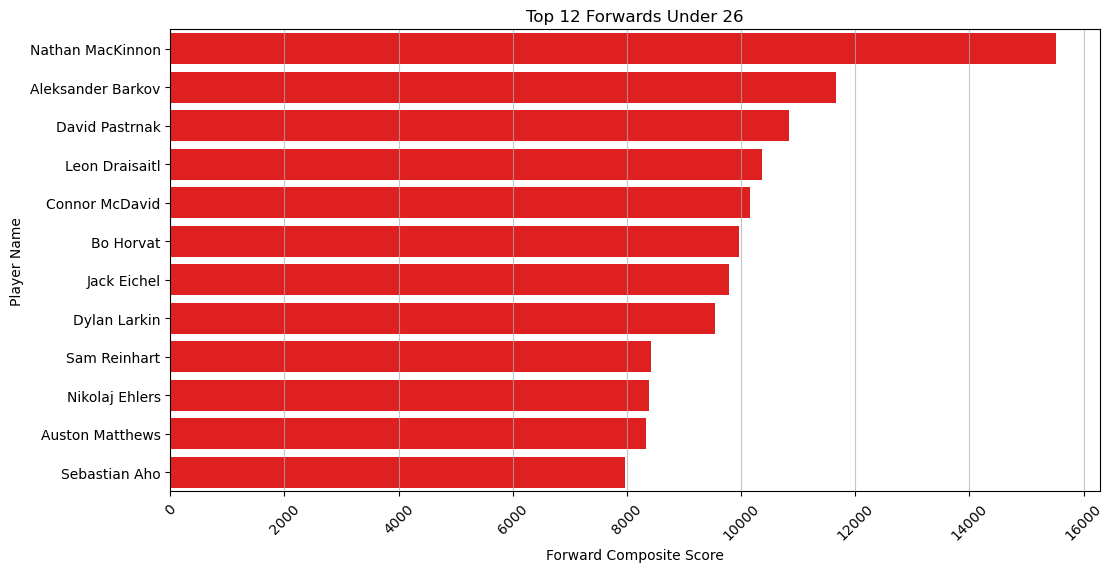

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create full name column for each DataFrame
top_12_forward_players['FullName'] = top_12_forward_players['firstname'] + ' ' + top_12_forward_players['lastname']

# Add rank column (if not already included)
top_12_forward_players['Rank'] = range(1, 13)

# Bar chart for top 12 forwards
plt.figure(figsize=(12, 6))
sns.barplot(x='ForwardCompositeScore', y='FullName', data=top_12_forward_players, color='red')
plt.title('Top 12 Forwards Under 26')
plt.xlabel('Forward Composite Score')
plt.ylabel('Player Name')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='-', alpha=0.7)

# Save the plot as a JPEG file
plt.savefig('top_12_forwards_under_26.jpeg', bbox_inches='tight', dpi=300)

plt.show()

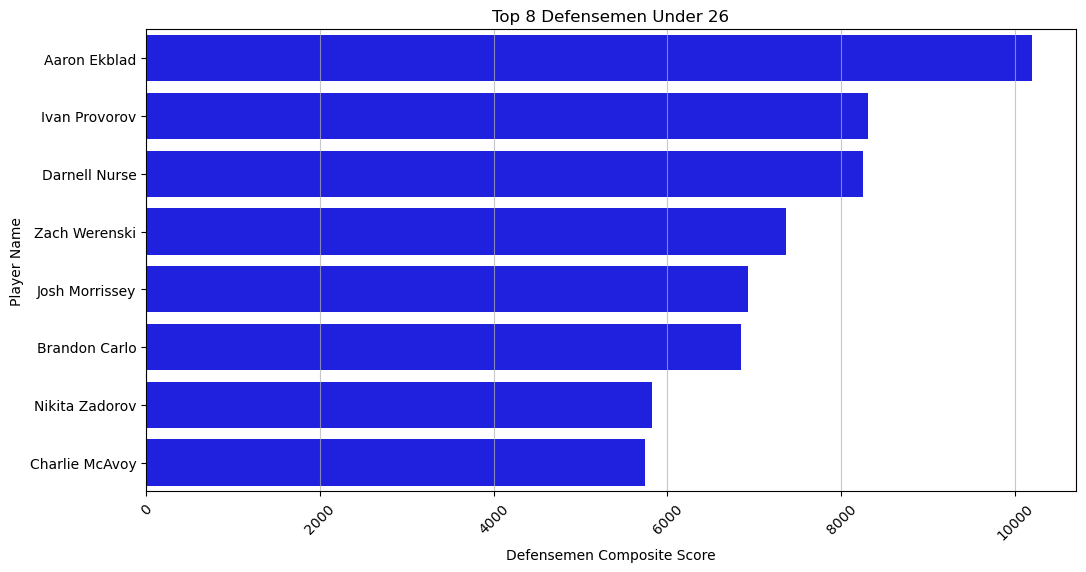

In [16]:
# Create full name column for each DataFrame
top_8_defensive_players['FullName'] = top_8_defensive_players['firstname'] + ' ' + top_8_defensive_players['lastname']

# Add rank column (if not already included)
top_8_defensive_players['Rank'] = range(1, 9)

# Bar chart for top 8 defensemen
plt.figure(figsize=(12, 6))
sns.barplot(x='DefensiveCompositeScore', y='FullName', data=top_8_defensive_players, color='blue')
plt.title('Top 8 Defensemen Under 26')
plt.xlabel('Defensemen Composite Score')
plt.ylabel('Player Name')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='-', alpha=0.7)

# Save the plot as a JPEG file
plt.savefig('top_8_defensemen_under_26.jpeg', bbox_inches='tight', dpi=300)

plt.show()

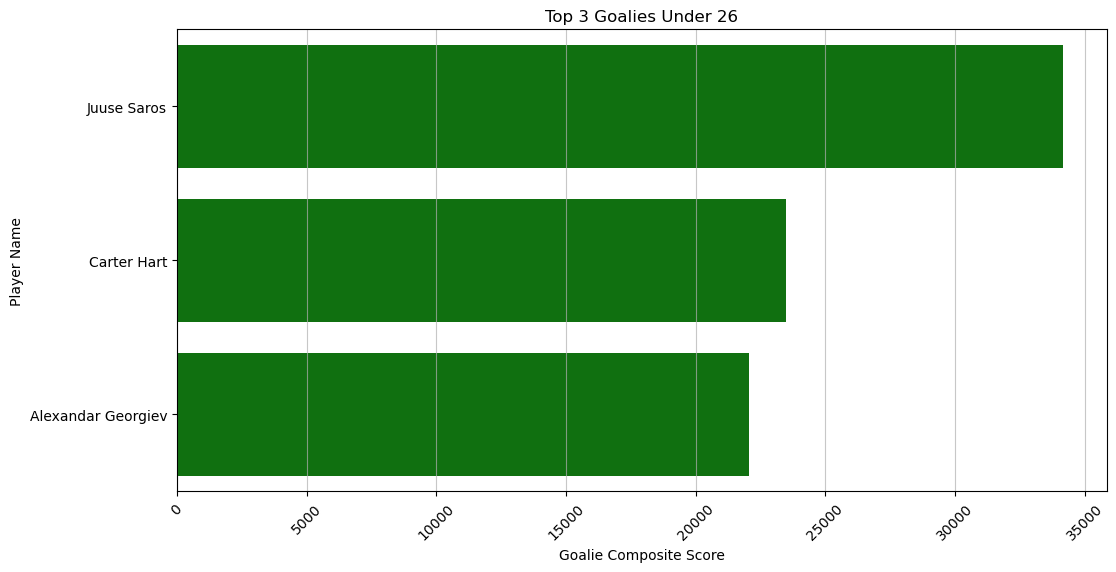

In [17]:
# Create full name column for each DataFrame
top_3_goalies['FullName'] = top_3_goalies['firstname'] + ' ' + top_3_goalies['lastname']

# Add rank column (if not already included)
top_3_goalies['Rank'] = range(1, 4)

# Bar chart for top 12 forwards
plt.figure(figsize=(12, 6))
sns.barplot(x='GoalieCompositeScore', y='FullName', data=top_3_goalies, color='green')
plt.title('Top 3 Goalies Under 26')
plt.xlabel('Goalie Composite Score')
plt.ylabel('Player Name')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='-', alpha=0.7)

# Save the plot as a JPEG file
plt.savefig('top_3_goalies_under_26.jpeg', bbox_inches='tight', dpi=300)

plt.show()

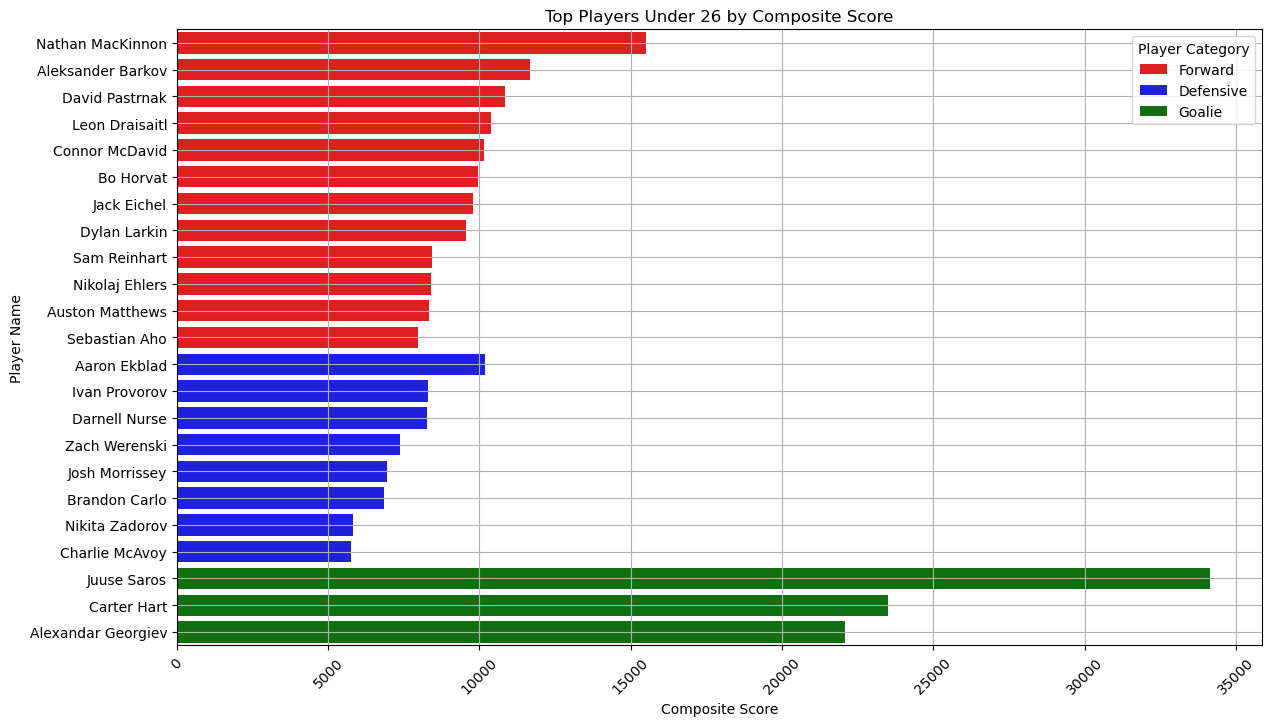

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrames top_12_forward_players, top_8_defensive_players, and top_3_goalies are already defined

# Add Category column to each DataFrame
top_12_forward_players['Category'] = 'Forward'
top_8_defensive_players['Category'] = 'Defensive'
top_3_goalies['Category'] = 'Goalie'

# Rename the score columns for clarity
top_12_forward_players.rename(columns={'ForwardCompositeScore': 'Score'}, inplace=True)
top_8_defensive_players.rename(columns={'DefensiveCompositeScore': 'Score'}, inplace=True)
top_3_goalies.rename(columns={'GoalieCompositeScore': 'Score'}, inplace=True)

# Combine data for a single plot
combined_data = pd.concat([
    top_12_forward_players[['FullName', 'Score', 'Category']],
    top_8_defensive_players[['FullName', 'Score', 'Category']],
    top_3_goalies[['FullName', 'Score', 'Category']]
])

# Define custom colors for each category
color_palette = {
    'Forward': 'red',
    'Defensive': 'blue',
    'Goalie': 'green'
}

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Score', y='FullName', hue='Category', data=combined_data, palette=color_palette)
plt.title('Top Players Under 26 by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Player Name')
plt.legend(title='Player Category')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('top_players_under_26.jpeg', bbox_inches='tight', dpi=300)

plt.show()

## 2021-2023 top

forward / offense: 
https://www.nhl.com/stats/skaters?reportType=season&seasonFrom=20212022&seasonTo=20222023&gameType=2&position=F&sort=points,goals,assists&page=0&pageSize=100

defense: 
https://www.nhl.com/stats/skaters?reportType=season&seasonFrom=20212022&seasonTo=20222023&gameType=2&position=D&sort=points,a_gamesPlayed&page=0&pageSize=100

goalie: 
https://www.nhl.com/stats/goalies?reportType=season&seasonFrom=20212022&seasonTo=20222023&gameType=2&sort=a_goalsAgainstAverage&page=0&pageSize=100

## Nikita_Zadorov wiki https://en.wikipedia.org/wiki/Nikita_Zadorov